# Pitch Contour
Slide : [ACA-Mono-Tonal-Monof0.pdf](https://github.com/alexanderlerch/ACA-Slides/blob/2nd_edition/07-03-03-ACA-Tonal-Monof0.pdf)

We are using different algorithms for detecting pitch for every frame using `computePitch()` from [pyACA repo](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/computePitch.py). 

Supported pitch trackers are:
    [`SpectralAcf`](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/PitchSpectralAcf.py), 
    [`SpectralHps`](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/PitchSpectralHps.py), 
    [`TimeAcf`](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/PitchTimeAcf.py), 
    [`TimeAmdf`](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/PitchTimeAmdf.py), 
    [`TimeAuditory`](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/PitchTimeAuditory.py), 
    [`TimeZeroCrossings`](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/PitchTimeZeroCrossings.py).

Please click on the function name as reference link for more implementation details!



## 1. Data and visualization 
First, we are going to call a toy dataset for pitch contour and visualize the ground truth

/Users/lego/anaconda3/lib/python3.11/site-packages/pyACA/ToolReadAudio.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [f_s, x] = wavread(cAudioFilePath)


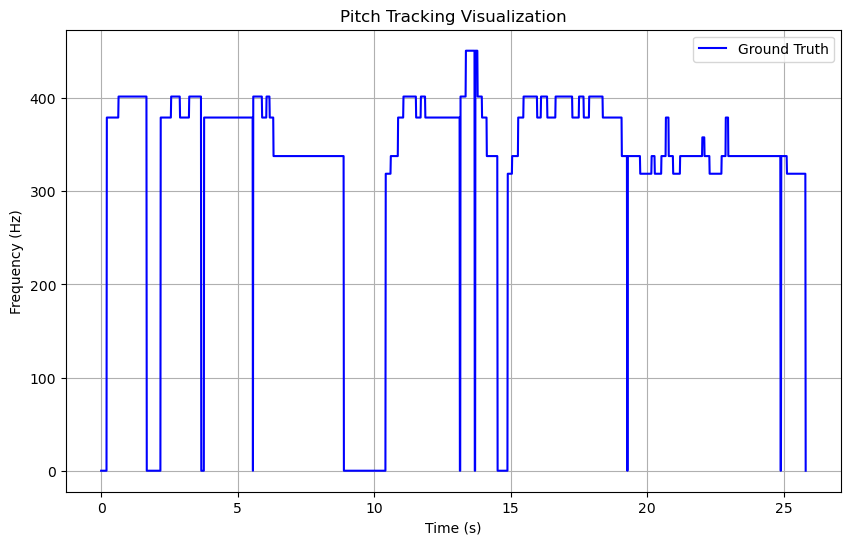

In [1]:
import pyACA
from utils.dataset import PitchDataset
from utils.visualize import visualizePitchTracking
dataset = PitchDataset()
#audio waveform, sampling rate, ground truth time stamps, ground truth frequency, ground truth quantized frequency
wav, sr, gt_time, gt_freq, gt_qfreq = dataset[0]
visualizePitchTracking(gt_time, gt_qfreq)

## 2. Estimation function
Here, you can replace any pitch contour algorithmn you would like to try!

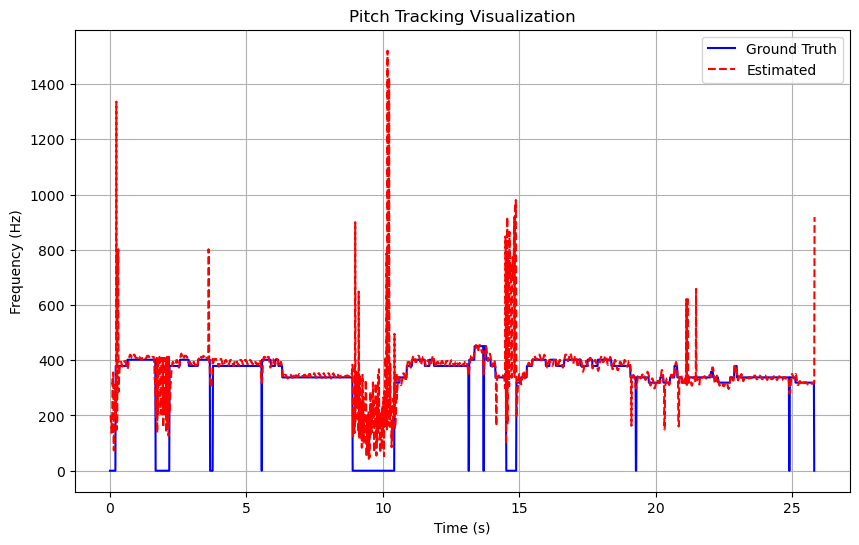

In [2]:
pitchAlgo = 'TimeAcf' # replace
est_freq, est_time = pyACA.computePitch(pitchAlgo, wav, sr, iBlockLength=1024, iHopLength=512)
visualizePitchTracking(gt_time, gt_qfreq, est_time=est_time, est_freq=est_freq)

## 3. Evaluation

We would adopt RMS error in cent in pitch domain to assess the estimation. To do that, we are going to convert (qunatize) frequency in Hz into MIDI note using [``ToolFreq2Midi``](https://github.com/alexanderlerch/pyACA/blob/master/pyACA/ToolFreq2Midi.py).

For example, the eval result about would be computed as:

In [3]:
from utils.eval import eval_pitchtrack
err = eval_pitchtrack(estimate_in_hz=est_freq, groundtruth_in_hz=gt_qfreq, mode='pitch')
print('RMS error in Cent: ', err) #TODO add absolute deviation 

RMS error in Cent:  49.79515968292645


## 4. Comparison between different Algorithms 
### 4.1 Test with Sine wave

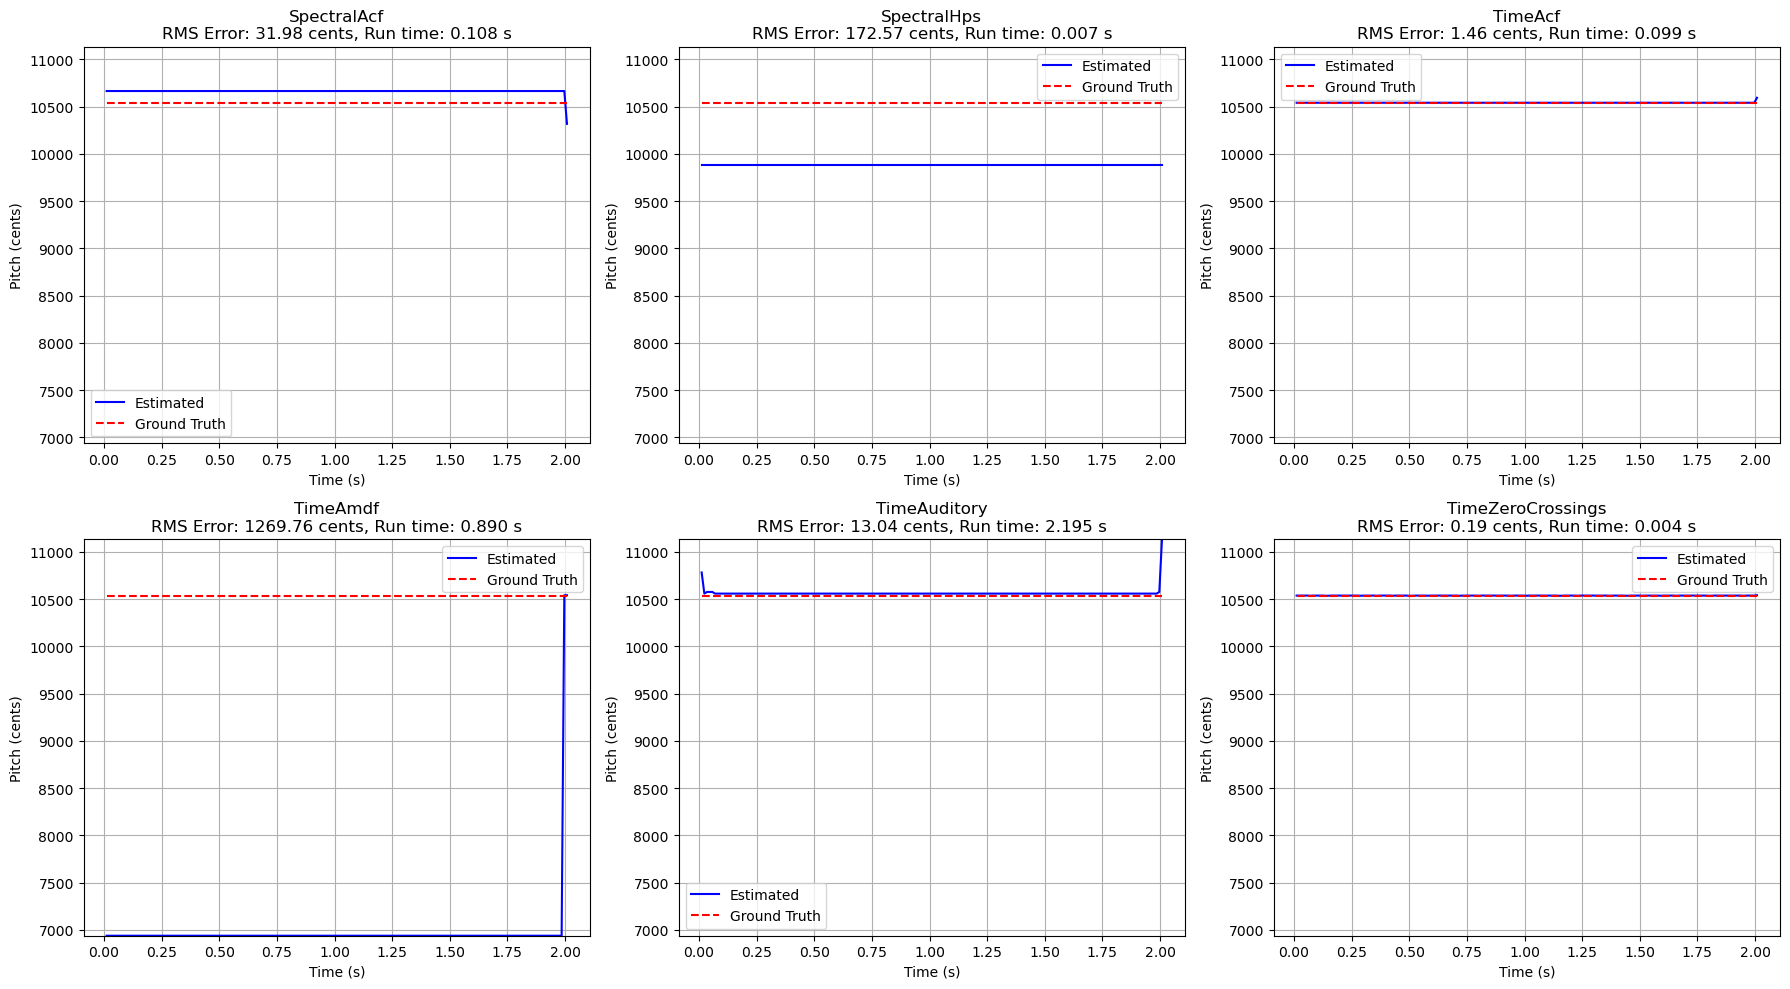

In [4]:
from utils.visualize import visualizeMultiPitchAlgo
from utils.base import sineWavGen
wav, sr, gt_qfreq = sineWavGen(440, 2, sr=44100)
visualizeMultiPitchAlgo(wav, sr, gt_qfreq=gt_qfreq)
# be careful with the y-axis (in cent) and x-axis scaling

### 4.2 Test with mixed song in toy dataset

/Users/lego/Gatech/pynbACA/utils/visualize.py:92: RuntimeWarning: divide by zero encountered in log2
  cents = np.where(freq > 0, 1200 * np.log2(freq / ref), np.nan)


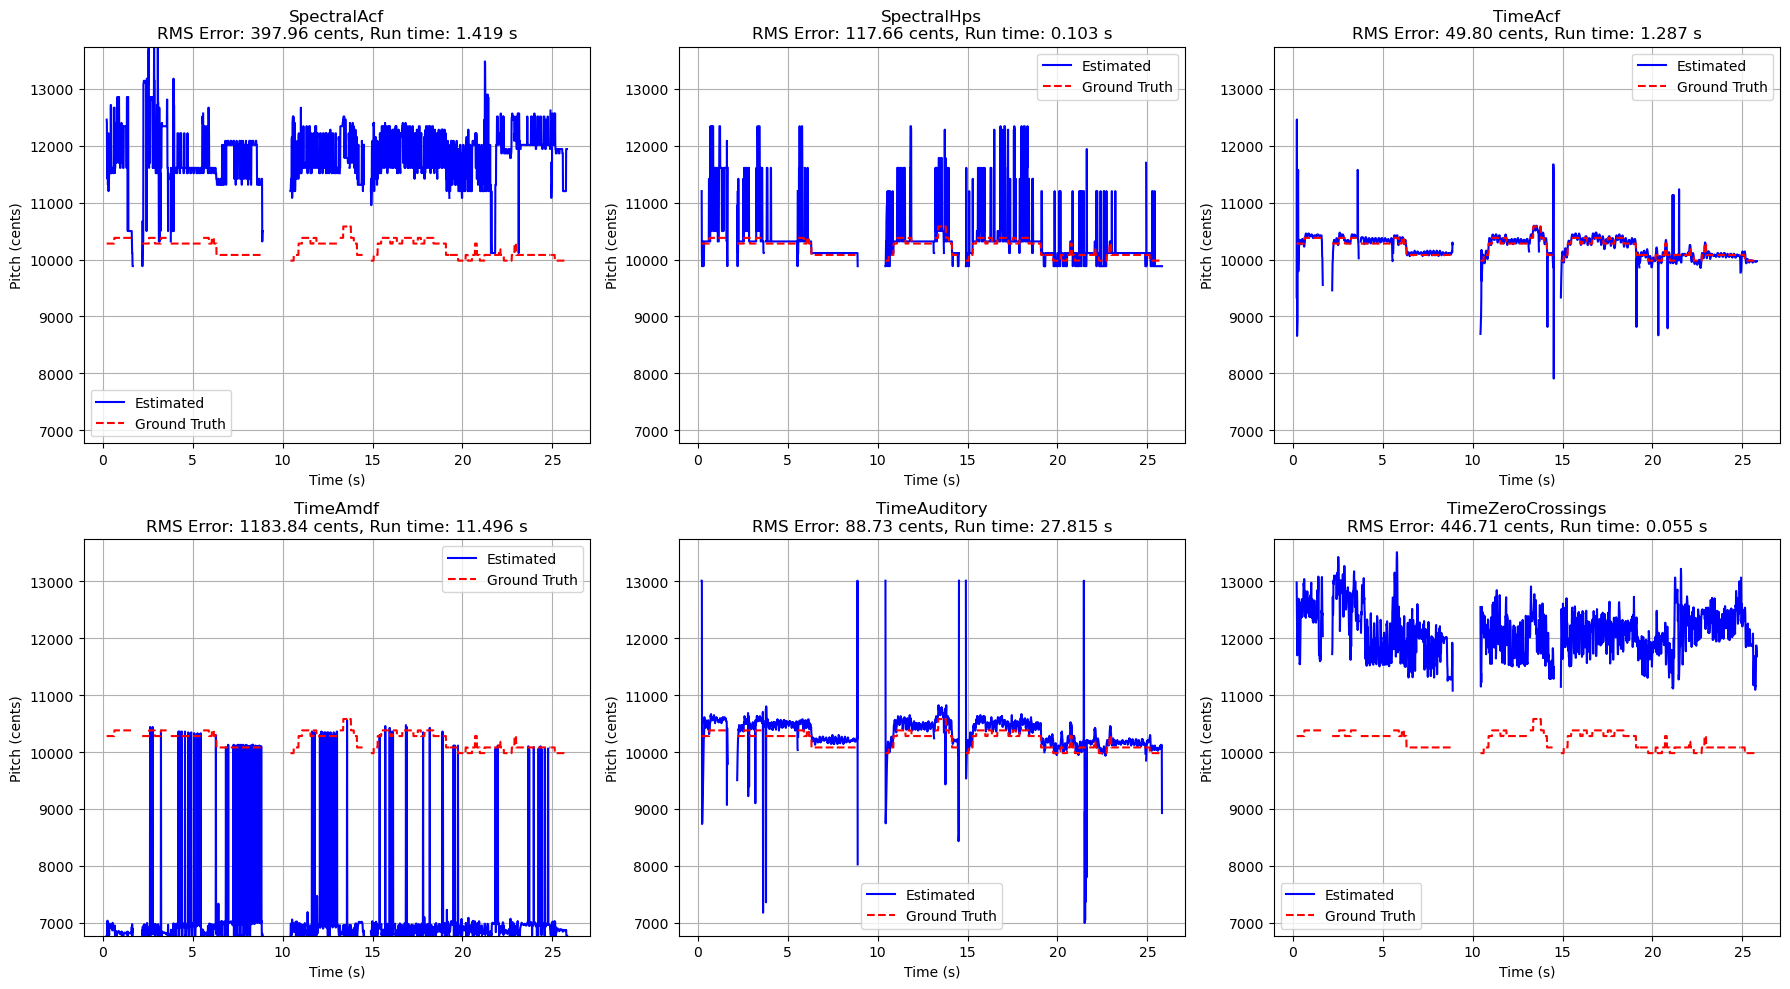

In [5]:
wav, sr, gt_time, gt_freq, gt_qfreq = dataset[0]
visualizeMultiPitchAlgo(wav, sr, gt_qfreq=gt_qfreq)

### 4.3 Test with another mixed song in toy dataset

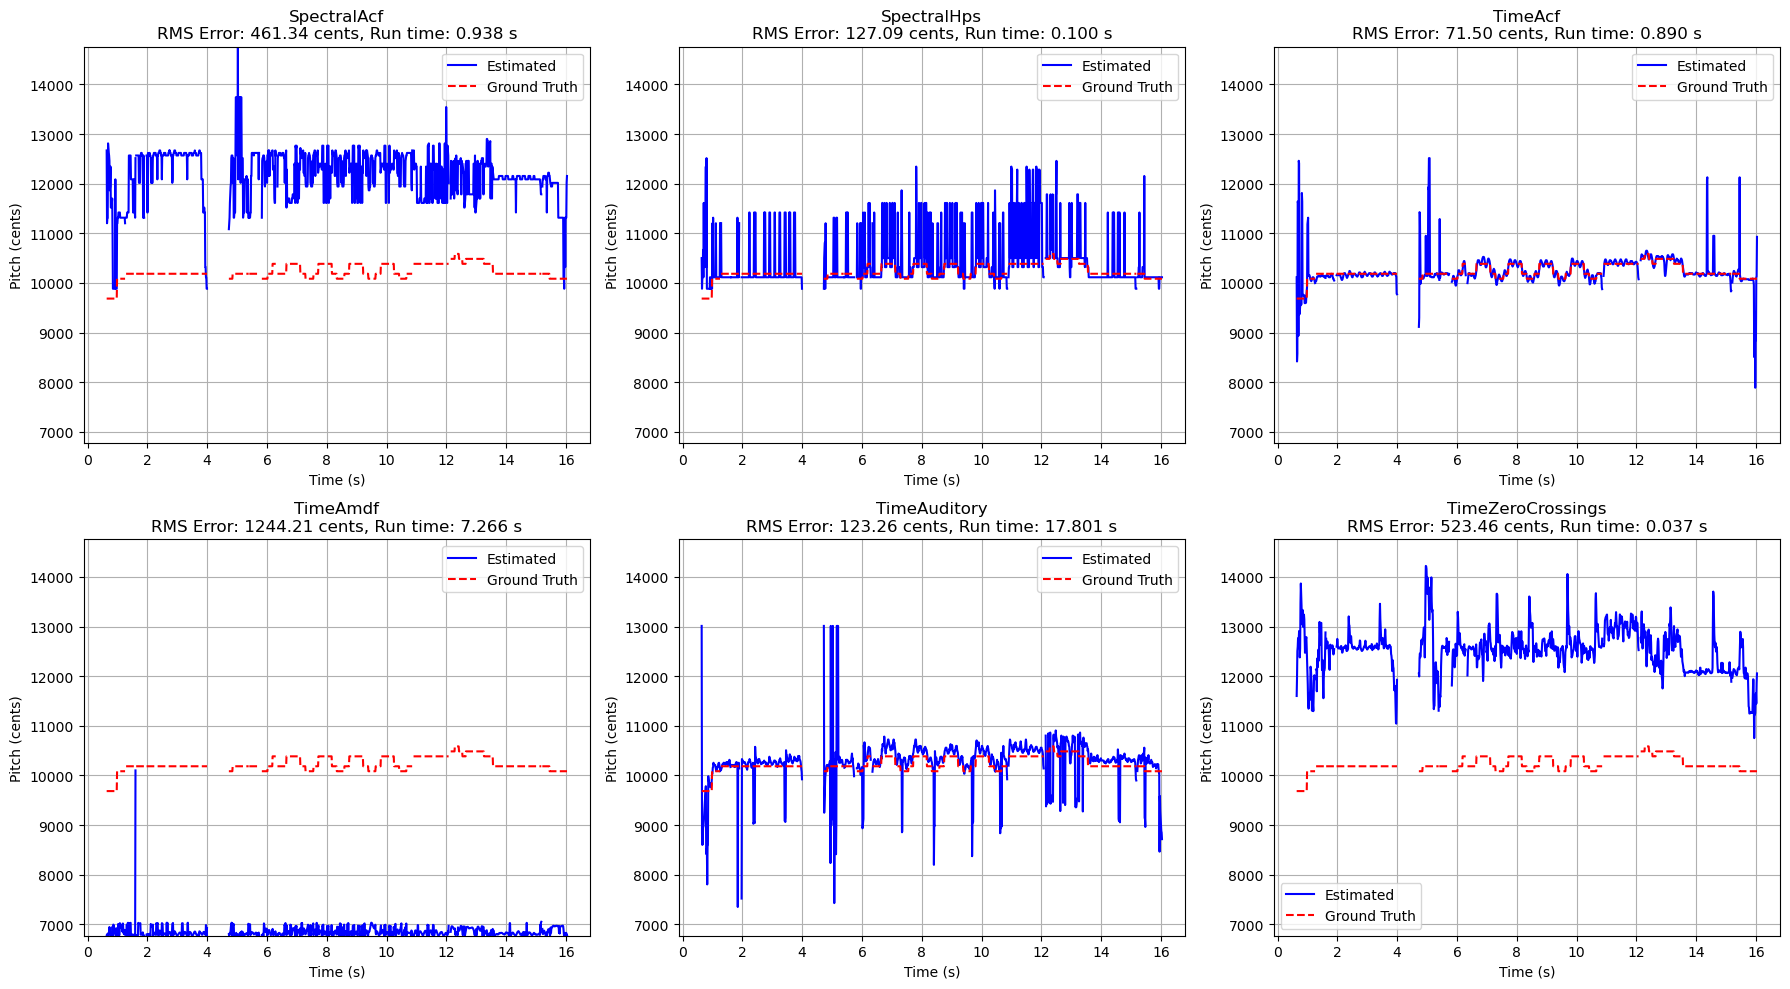

In [6]:
wav, sr, gt_time, gt_freq, gt_qfreq = dataset[2]
visualizeMultiPitchAlgo(wav, sr, gt_qfreq=gt_qfreq)

### TODO:

1. Deeper analysis?
    - hybrid version of pitch detection? (a part of the assignment in ACA class)
    - hop length, window size and other hyperparams study?
2. Should I focus on specific algorithm and explain a liitle bit more?


